### **Importing Required Libraries**
### We start by importing the necessary libraries for our analysis. These libraries provide functions and tools for data manipulation, visualization, and clustering.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### **Data Extraction: Obtaining the Dataset**
#### Here, we begin by extracting the dataset from the provided link. The dataset contains information about wines and will be stored in the variable *'data_wine'*.
#### We utilize the ***pandas*** library to read the dataset from the CSV file and display the first few rows to verify the structure.


In [2]:
url = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"
data_wine = pd.read_csv(url)
data_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's use the function .info() of pandas to see basic information about the dataset.

In [3]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Observing Dataset Information
#### Upon using the .info() function from pandas, we observe that the dataset comprises 13 attributes. All data types appear to be correct, and there are no null values present. So we start the exploratory data analysis (EDA) to gain more insights



## Exploratory Data Analysis (EDA)
#### We first use the .describe() function to generate descriptive statistics for numerical attributes, and then calculate the correlation matrix using the .corr() function

In [4]:
data_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
maps = data_wine.corr()
maps.style.background_gradient(cmap="coolwarm")

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Displaying the correlation matrix provides us with valuable information about the relationships between different attributes. Visualizing the correlation matrix using a heatmap enhances our understanding by highlighting strong and weak correlations. 
As we can see, *`Flavanoids`* and *`Total_Phenols`* exhibit strong correlations with nearly all other variables in the dataset. This could be suggesting the existing linear relationship between these attributes and others. 

Further investigation into these variables is **warranted** to understand their impact on the dataset. 

Additionally, it's worth highlighting the noteworthy correlations:
- Flavanoids and OD280 $(0.78)$
- Total_Phenols and OD280 $(0.699)$
- Alcohol and Proline $(0.64)$

These correlations suggest potential associations that may merit closer examination. Let's visualize these relationships using scatter plots.


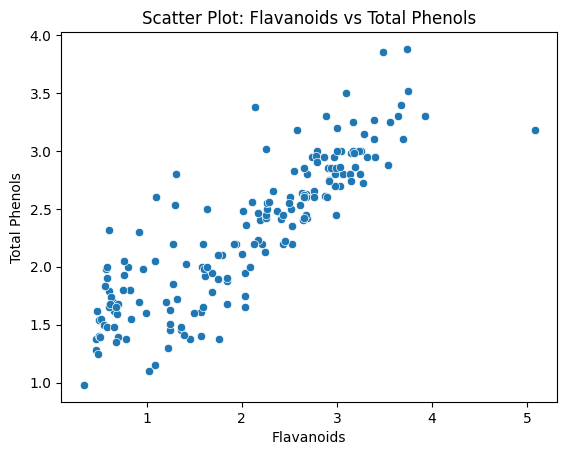

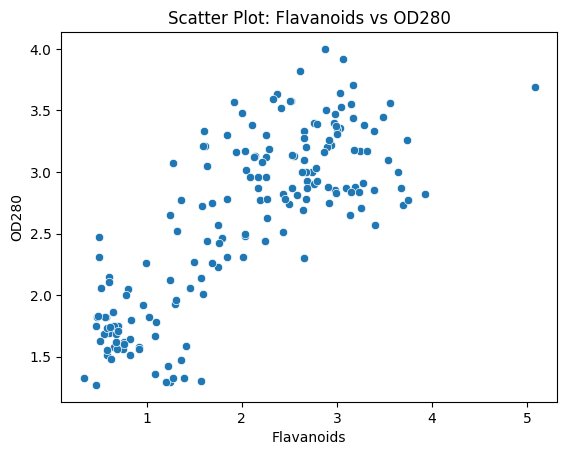

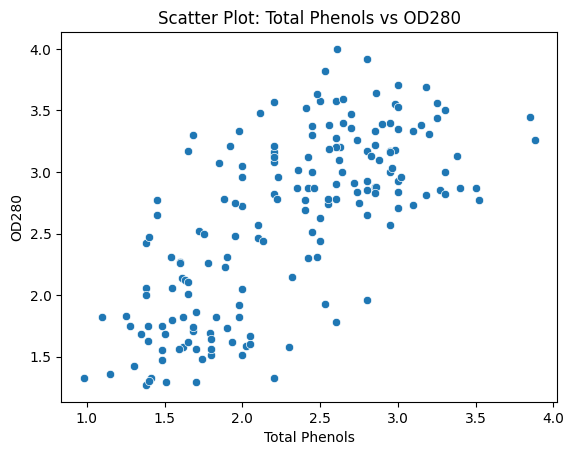

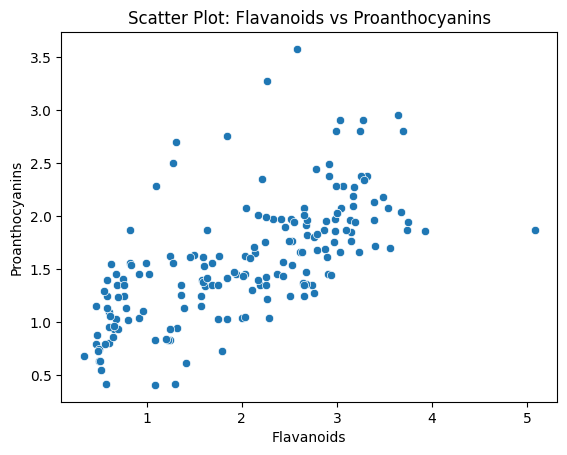

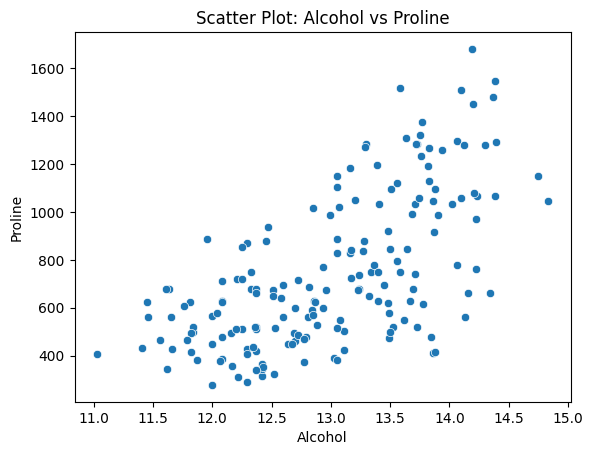

In [12]:
def create_scatterplot(x, y, xlabel, ylabel, title):
    sns.scatterplot(x=x, y=y, data=data_wine)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Scatter plots for specified variables
create_scatterplot('Flavanoids', 'Total_Phenols', 'Flavanoids', 'Total Phenols', 'Scatter Plot: Flavanoids vs Total Phenols')
create_scatterplot('Flavanoids', 'OD280', 'Flavanoids', 'OD280', 'Scatter Plot: Flavanoids vs OD280')
create_scatterplot('Total_Phenols', 'OD280', 'Total Phenols', 'OD280', 'Scatter Plot: Total Phenols vs OD280')
create_scatterplot('Flavanoids','Proanthocyanins','Flavanoids', 'Proanthocyanins', 'Scatter Plot: Flavanoids vs Proanthocyanins')
create_scatterplot('Alcohol', 'Proline', 'Alcohol', 'Proline', 'Scatter Plot: Alcohol vs Proline')


### Now, we do some unsupervised learning to group the wine data into different clusters..